In [1]:
import glob
import pandas as pd
import numpy as np
import sys
import operator
import numpy as np
from scipy import stats
import requests
from IPython.display import HTML
import matplotlib.pylab as plt
import warnings
import geopandas as gpd
from fiona.crs import from_epsg

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
# pluto = pd.read_csv("MN.csv")
# pluto.head()

In [40]:
# importing pluto sas area shapefile
poi_pluto = gpd.GeoDataFrame(gpd.read_file("PLUTO/area_of_interest.shp"))
poi_pluto.head()

files = glob.glob("data/*.xls")
dfs = [pd.read_excel(f, skiprows=4) for f in files]

for df in dfs:
    df.columns = ["_".join(x.strip().split(" ")) for x in df.columns]

manhattan_sales = pd.concat(dfs)
manhattan_sales.head()
len(manhattan_sales.drop_duplicates())

OrderedDict([(u'Borough', 'str:2'), (u'Block', 'int:10'), (u'Lot', 'int:10'), (u'CD', 'int:10'), (u'CT2010', 'str:7'), (u'CB2010', 'str:5'), (u'SchoolDist', 'str:2'), (u'Council', 'int:10'), (u'ZipCode', 'int:10'), (u'FireComp', 'str:4'), (u'PolicePrct', 'int:10'), (u'HealthArea', 'int:10'), (u'SanitBoro', 'str:1'), (u'SanitDistr', 'str:2'), (u'SanitSub', 'str:2'), (u'Address', 'str:28'), (u'ZoneDist1', 'str:9'), (u'ZoneDist2', 'str:9'), (u'ZoneDist3', 'str:9'), (u'ZoneDist4', 'str:9'), (u'Overlay1', 'str:4'), (u'Overlay2', 'str:4'), (u'SPDist1', 'str:6'), (u'SPDist2', 'str:6'), (u'SPDist3', 'str:6'), (u'LtdHeight', 'str:5'), (u'SplitZone', 'str:1'), (u'BldgClass', 'str:2'), (u'LandUse', 'str:2'), (u'Easements', 'int:10'), (u'OwnerType', 'str:1'), (u'OwnerName', 'str:21'), (u'LotArea', 'int:10'), (u'BldgArea', 'int:10'), (u'ComArea', 'int:10'), (u'ResArea', 'int:10'), (u'OfficeArea', 'int:10'), (u'RetailArea', 'int:10'), (u'GarageArea', 'int:10'), (u'StrgeArea', 'int:10'), (u'FactryAre

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,...,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
0,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,376,24,,C0,264 EAST 7TH STREET,,...,3,0,3,2059,3696,1900,1,C0,7738700,2016-12-22
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,375,28,,C4,738 EAST 6TH STREET,,...,11,0,11,1750,6500,1900,2,C4,3750000,2017-04-03
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,385,36,,C7,27 AVENUE C,,...,24,1,25,2650,9960,1910,2,C7,5235000,2017-07-11
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,5,,C2,151 AVENUE B,,...,5,0,5,2139,4416,1900,2,C2,0,2017-06-16
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19


In [117]:
merged = manhattan_sales.merge(poi_pluto, left_on=["BLOCK", "LOT"], right_on=["Block", "Lot"])
merged["SALE_MONTH"] = merged["SALE_DATE"].apply(lambda x: str(x.year) + "-" + str(x.month))

def gen_price_plot(min_price, max_price, title=None):
    sales_means = merged[(merged["SALE_PRICE"] >= min_price) & (merged["SALE_PRICE"] <= max_price)]\
                    .groupby("SALE_MONTH")\
                    .median()["SALE_PRICE"]
    sales_means.index = sales_means.index.map(lambda x: pd.to_datetime(x))
    ax = sales_means.plot(figsize=(16, 9))
    ax.axvline(datetime.datetime(2017, 1, 1), c='r', linestyle='--', label='SAS opening')
    ax.set_xlabel("Year - Month")
    ax.set_ylabel("Price ($$$)")
    ax.set_title("Prices over time" if not title else title)
    ax.legend()

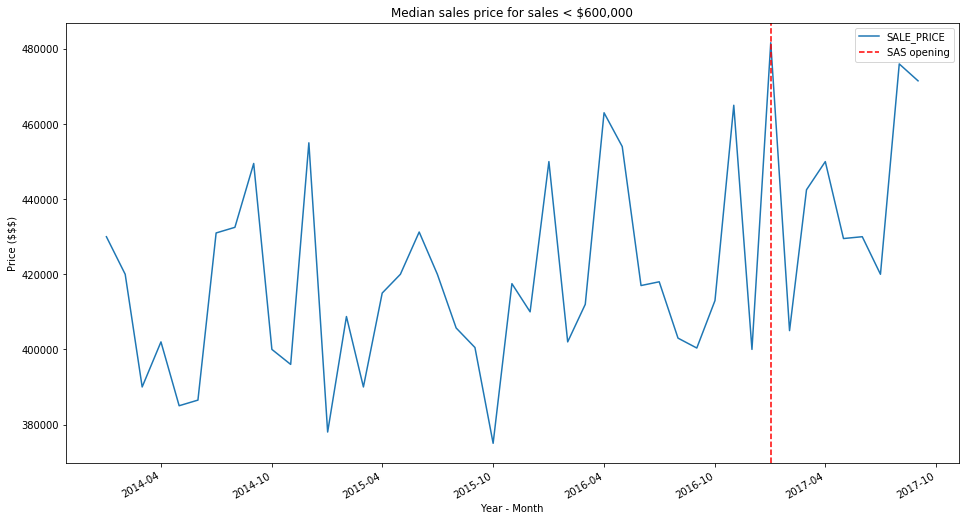

In [124]:
gen_price_plot(100000, 600000, "Median sales price for sales < $600,000")

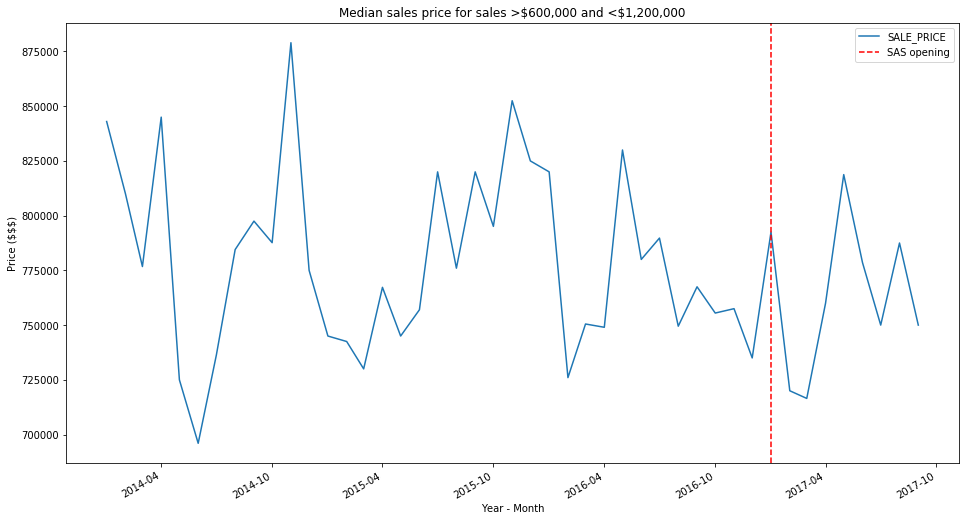

In [123]:
gen_price_plot(600000, 1200000, "Median sales price for sales >\$600,000 and <\$1,200,000")

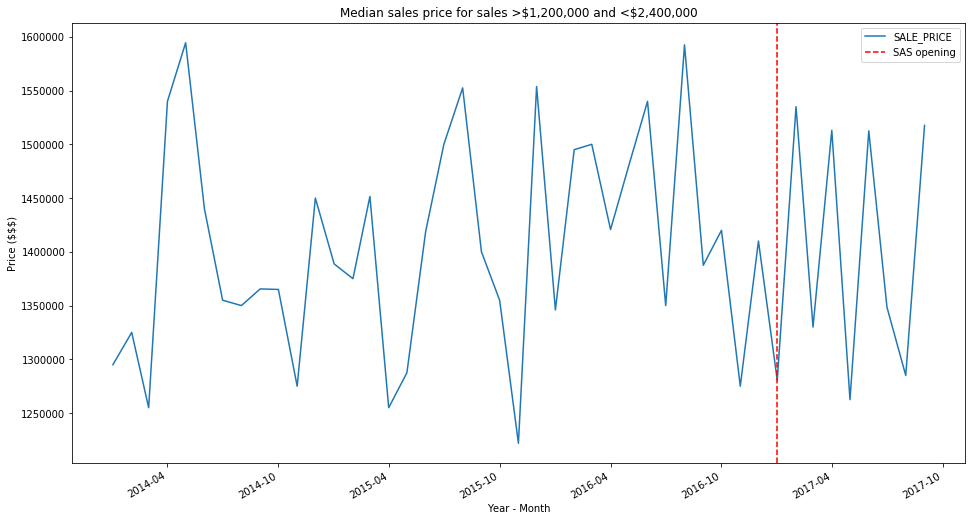

In [125]:
gen_price_plot(1000000, 2000000, "Median sales price for sales >\$1,200,000 and <\$2,400,000")

In [25]:
sales = pd.read_csv("rollingsales_final.CSV")
sales.columns

Index([u'BOROUGH', u'NEIGHBORHOOD', u'BUILDING CLASS CATEGORY',
       u'TAX CLASS AT PRESENT', u'BLOCK', u'LOT', u'EASE-MENT',
       u'BUILDING CLASS AT PRESENT', u'ADDRESS', u'APARTMENT NUMBER',
       u'ZIP CODE', u'RESIDENTIAL UNITS', u'COMMERCIAL UNITS', u'TOTAL UNITS',
       u'LAND SQUARE FEET', u'GROSS SQUARE FEET', u'YEAR BUILT',
       u'TAX CLASS AT TIME OF SALE', u'BUILDING CLASS AT TIME OF SALE',
       u'SALE PRICE', u'SALE DATE', u'BOROUGHBLOCKLOT'],
      dtype='object')

In [26]:
# Changing header for easy merging
sales = sales.rename(columns={'BOROUGHBLOCKLOT': 'BBL'})
sales.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BBL
0,1.0,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,376.0,24.0,,C0,264 EAST 7TH STREET,,...,0,3,"\t2,059","\t3,696",1900,1.0,C0,"\t7,738,700",12/22/16,137624.0
1,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,375.0,28.0,,C4,738 EAST 6TH STREET,,...,0,11,"\t1,750","\t6,500",1900,2.0,C4,"\t3,750,000",4/3/17,137528.0
2,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,385.0,36.0,,C7,27 AVENUE C,,...,1,25,"\t2,650","\t9,960",1910,2.0,C7,"\t5,235,000",7/11/17,138536.0
3,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392.0,5.0,,C2,151 AVENUE B,,...,0,5,"\t2,139","\t4,416",1900,2.0,C2,\t-,6/16/17,13925.0
4,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392.0,6.0,,C2,153 AVENUE B,,...,0,5,"\t1,633","\t6,440",1900,2.0,C2,"\t6,625,000",7/19/17,13926.0


In [28]:
# dropping nans and changing BBL to int for consistent formatting for merge
sales = sales[np.isfinite(sales['BBL'])]
sales.BBL = sales.BBL.astype(int)
len(sales)

17802

In [34]:
# force these to play nice
poi_pluto.BBL = sales.BBL

# merging
df = pd.merge(poi_pluto, sales, on='BBL')

len(df)

7055

In [39]:
sales["SALE DATE"].min()

'1/1/17'

___

### Finding time delta from sale to SAS opening 

In [11]:
# changing sale date to datetime
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])
# creating new column for subtraction with date of opening
df['sas'] = ('1/1/17')
# change to datetime
df['sas'] = pd.to_datetime(df['sas'])

In [12]:
# new column with change in time to sas opening
df['time'] = (df['SALE DATE'] - df['sas']).astype('timedelta64')
df.head()

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,sas,time
0,MN,1440,49,108,118,5000,02,5,10065,L016,...,3,"\t2,059","\t3,696",1900,1.0,C0,"\t7,738,700",2016-12-22,2017-01-01,-8.640000e+14
1,MN,1422,7501,108,118,3000,02,4,10065,L016,...,11,"\t1,750","\t6,500",1900,2.0,C4,"\t3,750,000",2017-04-03,2017-01-01,7.948800e+15
2,MN,1422,36,108,118,3000,02,4,10065,L016,...,25,"\t2,650","\t9,960",1910,2.0,C7,"\t5,235,000",2017-07-11,2017-01-01,1.650240e+16
3,MN,1422,2,108,118,3000,02,4,10065,L016,...,5,"\t2,139","\t4,416",1900,2.0,C2,\t-,2017-06-16,2017-01-01,1.434240e+16
4,MN,1424,43,108,126,4000,02,4,10021,L016,...,5,"\t1,633","\t6,440",1900,2.0,C2,"\t6,625,000",2017-07-19,2017-01-01,1.719360e+16


In [13]:
# wtf, is this format correct? 
df.time.describe()

count    7.055000e+03
mean     7.434686e+15
std      8.808533e+15
min     -7.948800e+15
25%     -1.728000e+14
50%      7.430400e+15
75%      1.529280e+16
max      2.332800e+16
Name: time, dtype: float64

# To do
- plot average sales prices and time to sas opening
- build regression model with inputs predicting price: time to sas opening, distance to subway, (other housing characteristics)
- write the damn thing up
